# Trabalho 2

## 4.1.7 b)

Neste notebook está o código relativo à DecisionTreeRegression.

### Imports

In [15]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import utilidades as ut
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text

### Inicializações e variáveis

In [16]:
warnings.filterwarnings("ignore")  # Desabilitar warnings.
plt.style.use(
    "style/estilo.mplstyle")  # Garantir que se utiliza um estilo definido centralmente e comum a todos os gráficos.
%matplotlib inline

label_encoder = LabelEncoder()

ficheiro = "dados_preparados.csv"
colunas_numericas = ["Idade", "FCV", "NRP", "CA", "FAF", "TUDE", "IMC"]
colunas_classes = ["Genero", "Historico_obesidade_familiar", "FCCAC", "Fumador", "MCC", "CCER", "CBA", "TRANS"]
colunas_classes_binarias = ['Genero', 'Historico_obesidade_familiar', 'FCCAC', 'Fumador', 'MCC']
colunas_classes_multiplos = ["CCER", "CBA", "TRANS", "Label"]

## Leitura dos dados preparados

In [17]:
dados_trabalho = pd.read_csv(ficheiro)

In [18]:
dados_trabalho

,Genero,Idade,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label,IMC
0,Feminino,21.000000,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.000000,Nao,0.000000,1.000000,Nao,Transportes_Publicos,Peso_Normal,24.386526
1,Feminino,21.000000,Sim,Nao,3.0,3.0,Ocasionalmente,Sim,3.000000,Sim,3.000000,0.000000,Ocasionalmente,Transportes_Publicos,Peso_Normal,24.238227
2,Masculino,23.000000,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.000000,Nao,2.000000,1.000000,Frequentemente,Transportes_Publicos,Peso_Normal,23.765432
3,Masculino,27.000000,Nao,Nao,3.0,3.0,Ocasionalmente,Nao,2.000000,Nao,2.000000,0.000000,Frequentemente,Caminhada,Excesso_Peso_Grau_I,26.851852
4,Masculino,22.000000,Nao,Nao,2.0,1.0,Ocasionalmente,Nao,2.000000,Nao,0.000000,0.000000,Ocasionalmente,Transportes_Publicos,Excesso_Peso_Grau_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Feminino,20.976842,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,1.728139,Nao,1.676269,0.906247,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,44.901475
2107,Feminino,21.982942,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.005130,Nao,1.341390,0.599270,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,43.741923
2108,Feminino,22.524036,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.054193,Nao,1.414209,0.646288,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,43.543817
2109,Feminino,24.361936,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.852339,Nao,1.139107,0.586035,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,44.071535


Temos no entanto de realizar primeiro o encoding das classes para valores numéricos, esta operação é realizada usando o ``sklearn.preprocessing.LabelEncoder`` em todas as colunas com apenas 2 classes.

In [19]:
ut.titulo("Valores codificados por atributo")

for coluna in colunas_classes_binarias:
    if dados_trabalho[coluna].dtype == 'object':
        dados_trabalho[coluna] = label_encoder.fit_transform(dados_trabalho[coluna].values)
        ut.etiqueta_e_valor(coluna, str(sorted(dados_trabalho[coluna].unique())))

Valores codificados por atributo
Genero: [0, 1]
Historico_obesidade_familiar: [0, 1]
FCCAC: [0, 1]
Fumador: [0, 1]
MCC: [0, 1]


Para colunas que têm mais que 2 classes precisamos de utilizar o ``pandas.get_dummies()``.

In [20]:
dados_trabalho = pd.get_dummies(dados_trabalho, dtype=float)

In [21]:
dados_trabalho

,Genero,Idade,Historico_obesidade_familiar,FCCAC,FCV,NRP,Fumador,CA,MCC,FAF,...,TRANS_Transportes_Publicos,Label_Excesso_Peso_Grau_I,Label_Excesso_Peso_Grau_II,Label_Magreza_Grau_I,Label_Magreza_Grau_II,Label_Magreza_Grau_III,Label_Obesidade_Moderada,Label_Obesidade_Mórbida,Label_Obesidade_Severa,Label_Peso_Normal
0,0,21.000000,1,0,2.0,3.0,0,2.000000,0,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,21.000000,1,0,3.0,3.0,1,3.000000,1,3.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,23.000000,1,0,2.0,3.0,0,2.000000,0,2.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,27.000000,0,0,3.0,3.0,0,2.000000,0,2.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,22.000000,0,0,2.0,1.0,0,2.000000,0,0.000000,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1,1,3.0,3.0,0,1.728139,0,1.676269,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2107,0,21.982942,1,1,3.0,3.0,0,2.005130,0,1.341390,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2108,0,22.524036,1,1,3.0,3.0,0,2.054193,0,1.414209,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2109,0,24.361936,1,1,3.0,3.0,0,2.852339,0,1.139107,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


| Target | Preditores |
|--------|------------|
| IMC    | ??         |

Ver TP5

O target não muda

In [22]:
y = dados_trabalho.IMC

## Preditores

In [23]:
# O preditor vai mudando, podemos ter uma lista com o nome das colunas
# lista_preditores = ['Genero', 'Historico_obesidade_familiar', 'FCCAC', 'FCV', 'NRP', 'CCER', 'Fumador', 'CA', 'MCC', 'FAF', 'TUDE', 'CBA', 'TRANS']

lista_preditores = dados_trabalho.columns
X = dados_trabalho[lista_preditores].to_numpy()

### Holdout

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

## Cálculo

TODO: Rever o código é cópia do TP5, ver TP7 tem uns testes que talvez sejam necessários.

In [25]:
arvore_decisao = DecisionTreeRegressor(
    random_state=42,
    max_depth=6,
    min_samples_split=3
)  # Restrição de alguns parâmetros da árvore
modelo_regressao = arvore_decisao.fit(X_train, y_train)

y_pred = arvore_decisao.predict(X_train)
y_pred1 = arvore_decisao.predict(X_test)

In [26]:
MAE1 = metrics.mean_absolute_error(y_train, y_pred)
MAE2 = metrics.mean_absolute_error(y_test, y_pred1)
MAE3 = np.mean(abs(y_test - y_pred1))  #efetuando os cálculos

print("MAE on training set: {:.3f}".format(MAE1))
print("MAE on test set: {:.3f}".format(MAE2))
print("MAE on test set: {:.3f}".format(MAE3))  #efetuando os cálculos

RMSE = np.sqrt(np.mean((y_test - y_pred1) ** 2))
print("RMSE: {:.4f}".format(RMSE))

MAE on training set: 0.116
MAE on test set: 0.131
MAE on test set: 0.131
RMSE: 0.1649


Visualização da Regression Tree

TODO: QUe valores utilizar?

[Text(0.5, 0.9285714285714286, 'IMC <= 30.212\nsquared_error = 64.147\nsamples = 1688\nvalue = 29.583'),
 Text(0.25, 0.7857142857142857, 'IMC <= 22.707\nsquared_error = 18.121\nsamples = 921\nvalue = 23.45'),
 Text(0.125, 0.6428571428571429, 'IMC <= 19.425\nsquared_error = 3.86\nsamples = 371\nvalue = 18.768'),
 Text(0.0625, 0.5, 'IMC <= 17.169\nsquared_error = 0.844\nsamples = 254\nvalue = 17.59'),
 Text(0.03125, 0.35714285714285715, 'IMC <= 14.843\nsquared_error = 0.728\nsamples = 60\nvalue = 16.399'),
 Text(0.015625, 0.21428571428571427, 'NRP <= 3.049\nsquared_error = 0.294\nsamples = 4\nvalue = 13.676'),
 Text(0.0078125, 0.07142857142857142, 'squared_error = 0.021\nsamples = 2\nvalue = 13.145'),
 Text(0.0234375, 0.07142857142857142, 'squared_error = 0.002\nsamples = 2\nvalue = 14.207'),
 Text(0.046875, 0.21428571428571427, 'IMC <= 16.514\nsquared_error = 0.192\nsamples = 56\nvalue = 16.593'),
 Text(0.0390625, 0.07142857142857142, 'squared_error = 0.083\nsamples = 23\nvalue = 16.144

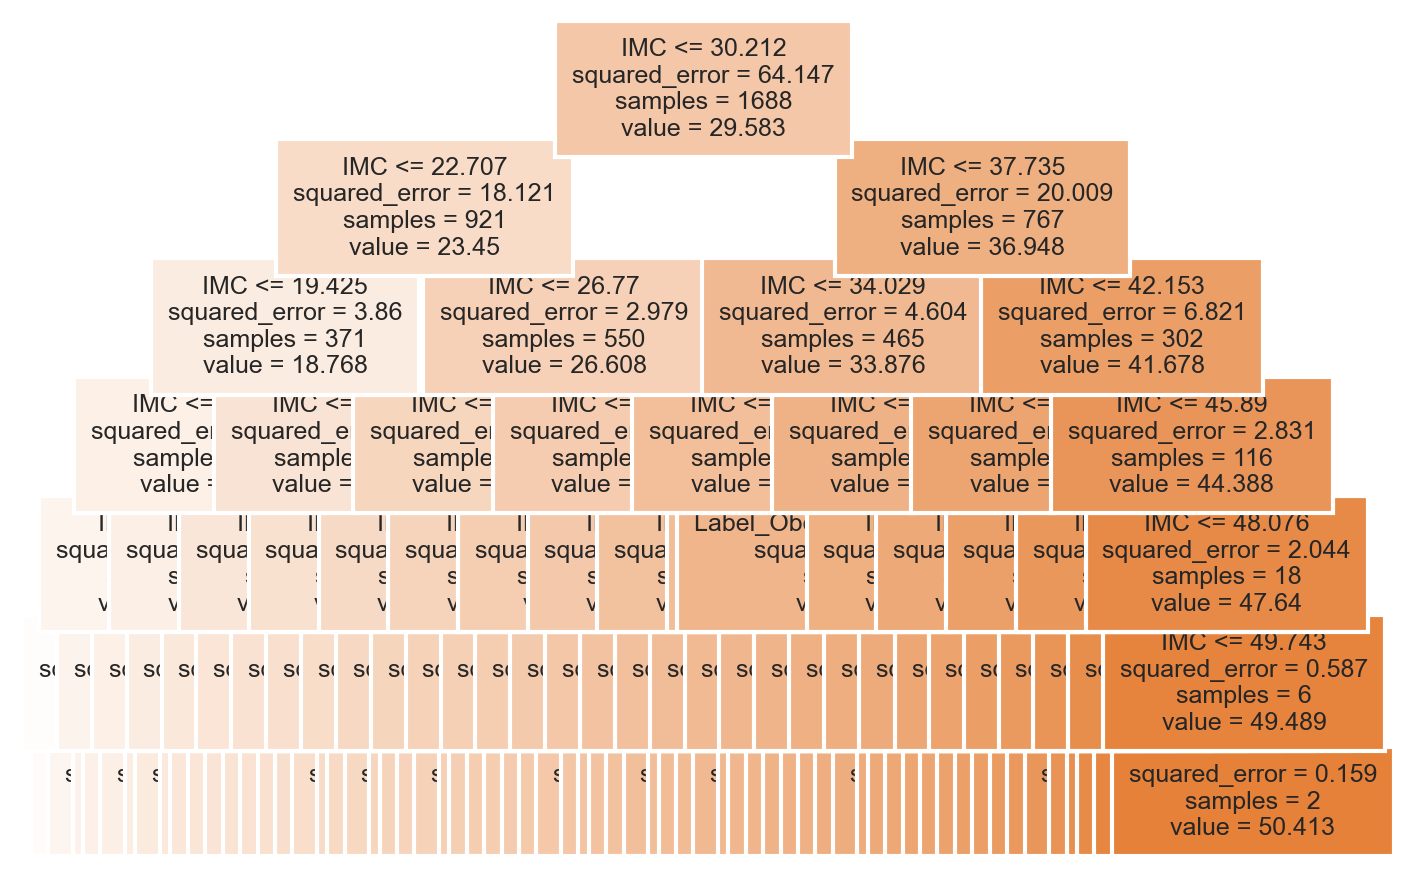

In [27]:
plot_tree(
    modelo_regressao,
    feature_names=list(dados_trabalho.columns),
    class_names=list(dados_trabalho['IMC']),
    filled=True,
    fontsize=6
)

### Modelo de regressão

In [28]:
print(export_text(modelo_regressao, show_weights=True))

|--- feature_11 <= 30.21
|   |--- feature_11 <= 22.71
|   |   |--- feature_11 <= 19.42
|   |   |   |--- feature_11 <= 17.17
|   |   |   |   |--- feature_11 <= 14.84
|   |   |   |   |   |--- feature_5 <= 3.05
|   |   |   |   |   |   |--- value: [13.15]
|   |   |   |   |   |--- feature_5 >  3.05
|   |   |   |   |   |   |--- value: [14.21]
|   |   |   |   |--- feature_11 >  14.84
|   |   |   |   |   |--- feature_11 <= 16.51
|   |   |   |   |   |   |--- value: [16.14]
|   |   |   |   |   |--- feature_11 >  16.51
|   |   |   |   |   |   |--- value: [16.91]
|   |   |   |--- feature_11 >  17.17
|   |   |   |   |--- feature_11 <= 18.25
|   |   |   |   |   |--- feature_11 <= 17.70
|   |   |   |   |   |   |--- value: [17.45]
|   |   |   |   |   |--- feature_11 >  17.70
|   |   |   |   |   |   |--- value: [17.95]
|   |   |   |   |--- feature_11 >  18.25
|   |   |   |   |   |--- feature_11 <= 18.84
|   |   |   |   |   |   |--- value: [18.51]
|   |   |   |   |   |--- feature_11 >  18.84
|   |   |  

TODO: Abrir o dataframe do RMSE e MAE e adicionar resultados.